# 病理图像大小统计和可视化

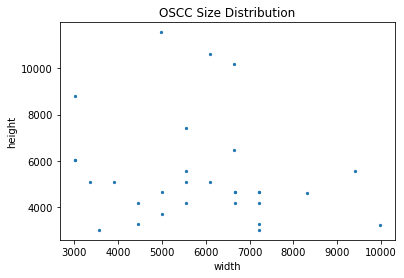

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


img_dir = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/5x_filter/filtered_mask'
x = []
y = []
for c in os.listdir(img_dir):
    img = cv2.imread(os.path.join(img_dir, c))
    h, w, _ = img.shape
    x.append(w)
    y.append(h)
x = np.array(x)
y = np.array(y)

plt.scatter(x, y, s=5)
plt.title('OSCC Size Distribution')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

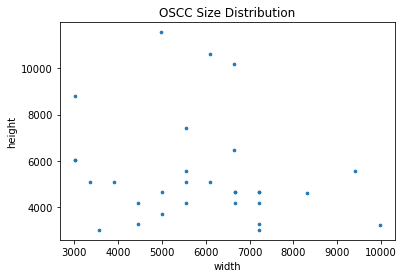

In [9]:
plt.figure()
plt.scatter(x, y, s=7)
plt.title('OSCC Size Distribution')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [11]:
(np.mean(x) + np.mean(y)) / 2

5632.583333333334

In [9]:
import pandas as pd

xlsx_path = '/media/ldy/7E1CA94545711AE6/OSCC/口腔鳞癌数据集情况统计.xlsx'
histo_term = '病理号'  # 1
tumor_term = '肿瘤分布' # 3
anno_term = '标注程度' # 4
data_meta = pd.read_excel(xlsx_path)

# 病人统计

In [36]:
histo = data_meta[histo_term]
ids = {}  #　病理号－文件名字典
for c in histo:
    sp = c.split('-')
    if len(sp) == 2:
        k = c
    else:
        k = sp[0] + '-' + sp[1]
    if k not in ids.keys():
        ids[k] = [c]
    else:
        ids[k].append(c)

In [38]:
len(ids.keys())  #病人数量

114

Text(0.5, 1.0, 'id-patients distribution')

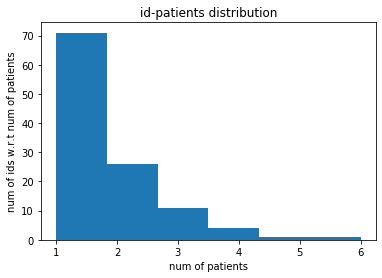

In [42]:
num_per_patient = [len(v) for v in ids.values()]

plt.figure()
plt.hist(num_per_patient, bins=6)
plt.xlabel('num of patients')
plt.ylabel('num of ids w.r.t num of patients')
plt.title('id-patients distribution')

# 训练集、验证集选择

In [22]:
info = {}
for c in data_meta.itertuples():
    if c[6] != '2019_test':  #尚未标注，无法使用
        info[c[1]] = tuple([c[3], int(c[4])])

In [25]:
len(info.keys())   #样本数量, 训练集108, 测试集36

144

In [47]:
dense = []
distributed = []
sparse = []
undiffered = []
cavity = []

for k, v in info.items():
    if isinstance(v[0], int):
        if v[0] == 1:
            dense.append((k, v[1]))
        elif v[0] == 2:
            distributed.append((k, v[1]))
        elif v[0] == 3:
            sparse.append((k, v[1]))
        elif v[0] == 4:
            undiffered.append((k, v[1]))
        elif v[0] == 5:
            cavity.append((k, v[1]))
    else:
        sp = v[0].split('+')
        t1, t2 = int(sp[0]), int(sp[1])
        if t1 == 1 or t2 == 1:
            dense.append((k, v[1]))
        if t1 == 2 or t2 == 2:
            distributed.append((k, v[1]))
        if t1 == 3 or t2 == 3:
            sparse.append((k, v[1]))
        if t1 == 4 or t2 == 4:
            undiffered.append((k, v[1]))
        if t1 == 5 or t2 == 5:
            cavity.append((k, v[1]))

In [48]:
print(len(dense), len(distributed), len(sparse), len(undiffered), len(cavity))
# 19 6 4 2 5 

82 23 18 9 22


In [29]:
coarse = []
standard = []
fine = []

for k, v in info.items():
    if v[1] == 1:
        standard.append((k, v[0]))
    elif v[1] == 2:
        fine.append((k, v[0]))
    else:
        coarse.append((k, v[0]))

In [30]:
print(len(coarse), len(standard), len(fine))

26 70 48


In [52]:
space = [0]*5
for c in fine:
    if isinstance(c[1], int):
        space[c[1]-1] += 1
    else:
        space[int(c[1][0])-1] += 1
        space[int(c[1][2])-1] += 1
print(space)

[23, 7, 9, 4, 7]


In [53]:
space = [0]*5
for c in standard:
    if isinstance(c[1], int):
        space[c[1]-1] += 1
    else:
        space[int(c[1][0])-1] += 1
        space[int(c[1][2])-1] += 1
print(space)

[47, 10, 4, 4, 11]


In [54]:
fine

[('2017-05588', 1),
 ('2019-00890', 1),
 ('2019-00898-3', 1),
 ('2019-01014-2', 1),
 ('2019-01279', 1),
 ('2019-01487-2', 1),
 ('2019-01588', 3),
 ('2019-01665', 3),
 ('2019-02267-2', 1),
 ('2019-02666-2', 3),
 ('2019-02666-3', 3),
 ('2019-03330', 3),
 ('2019-16619', 1),
 ('2020-07451', 1),
 ('2020-07484-2', 1),
 ('2020-07512', 2),
 ('2020-07764', 1),
 ('2020-07769-2', 2),
 ('2020-07912', 1),
 ('2020-07912-2', 1),
 ('2020-07916', 1),
 ('2020-07933', 3),
 ('2020-08200', 5),
 ('2020-08200-2', 1),
 ('2020-08348', 1),
 ('2020-08348-2', 2),
 ('2020-08370', 1),
 ('2020-08595', 4),
 ('2020-08595-2', 4),
 ('2020-08595-3', 4),
 ('2020-08752-2', 1),
 ('2020-08808-2', 5),
 ('2020-08812-2', 1),
 ('2020-09017', '2+5'),
 ('2020-09043', '1+3'),
 ('2020-09387', 5),
 ('2020-09612', 3),
 ('2020-09613', 1),
 ('2020-09692', 2),
 ('2020-09692-3', 2),
 ('2020-09692-7', 5),
 ('2020-09837', 3),
 ('2020-10140', 1),
 ('2020-10463-2', 5),
 ('2020-10519', 1),
 ('2020-10759', 5),
 ('2020-10759-3', 4),
 ('2020-1076

In [57]:
import random

random.shuffle(fine)
print(fine[:30])

[('2020-09017', '2+5'), ('2020-10759', 5), ('2020-09692-7', 5), ('2020-08812-2', 1), ('2020-07933', 3), ('2020-10140', 1), ('2019-03330', 3), ('2020-09387', 5), ('2020-08370', 1), ('2020-08348-2', 2), ('2020-10519', 1), ('2020-07451', 1), ('2020-08595-2', 4), ('2020-09837', 3), ('2019-00898-3', 1), ('2020-08200-2', 1), ('2019-01487-2', 1), ('2020-08348', 1), ('2017-05588', 1), ('2020-07912', 1), ('2019-02267-2', 1), ('2020-07512', 2), ('2019-02666-2', 3), ('2020-07484-2', 1), ('2020-08752-2', 1), ('2019-01279', 1), ('2019-01014-2', 1), ('2020-08595', 4), ('2020-08200', 5), ('2019-02666-3', 3)]


In [58]:
space = [0]*5
for c in fine[:30]:
    if isinstance(c[1], int):
        space[c[1]-1] += 1
    else:
        space[int(c[1][0])-1] += 1
        space[int(c[1][2])-1] += 1
print(space)

[16, 3, 5, 2, 5]


## 分析现有验证集

In [84]:
part_xlsx = '/media/ldy/7E1CA94545711AE6/OSCC/口腔鳞癌数据集-part.xlsx'
part_meta = pd.read_excel(part_xlsx)
part_info = {}
for c in part_meta.itertuples():
    print(c)
    if c[9] == 1 or c[9] == 1.0:
        part_info[c[1]] = tuple([c[3], int(c[4])])

Pandas(Index=0, 病理号='2016-01459', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190404173751.0, 来源=2019.0, 描述=nan, cut=1.0, 测试集=nan)
Pandas(Index=1, 病理号='2016-01459-2', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190409135946.0, 来源=2019.0, 描述=nan, cut=1.0, 测试集=nan)
Pandas(Index=2, 病理号='2016-01459-3', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190409141622.0, 来源=2019.0, 描述=nan, cut=nan, 测试集=nan)
Pandas(Index=3, 病理号='2016-01459-4', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190412133705.0, 来源=2019.0, 描述=nan, cut=nan, 测试集=nan)
Pandas(Index=4, 病理号='2016-01459-5', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190412133715.0, 来源=2019.0, 描述=nan, cut=nan, 测试集=nan)
Pandas(Index=5, 病理号='2016-01459-6', 颜色风格=2, 肿瘤分布=5, 标注程度=3, 文件名=20190412133725.0, 来源=2019.0, 描述=nan, cut=nan, 测试集=nan)
Pandas(Index=6, 病理号='2017-05588', 颜色风格=2, 肿瘤分布=1, 标注程度=2, 文件名=20190404140844.0, 来源=2019.0, 描述=nan, cut=nan, 测试集=1.0)
Pandas(Index=7, 病理号='2017-11739', 颜色风格=2, 肿瘤分布=1, 标注程度=1, 文件名=20190403115208.0, 来源=2019.0, 描述=nan, cut=1.0, 测试集=nan)
Pandas(Index=8, 病理号='2017-12386', 颜色风格=2, 肿瘤分布=1, 标注程度

In [85]:
part_info

{'2017-05588': (1, 2),
 '2019-01014': (1, 1),
 '2019-01014-2': (1, 2),
 '2019-01487': (1, 1),
 '2019-01487-2': (1, 2),
 '2019-02666': (1, 1),
 '2019-02666-2': (3, 2),
 '2019-02666-3': (3, 2),
 '2019-02666-4': (3, 3),
 '2019-15984': (3, 1),
 '2020-07451': (1, 2),
 '2020-07484-2': (1, 2),
 '2020-07512': (2, 2),
 '2020-07912': (1, 2),
 '2020-07912-2': (1, 2),
 '2020-07933': (3, 2),
 '2020-08200': (5, 2),
 '2020-08200-2': (1, 2),
 '2020-08348': (1, 2),
 '2020-08348-2': (2, 2),
 '2020-08348-3': (5, 1),
 '2020-08348-4': (1, 1),
 '2020-08370': (1, 2),
 '2020-08595': (4, 2),
 '2020-08595-2': (4, 2),
 '2020-08595-3': (4, 2),
 '2020-08752-2': (1, 2),
 '2020-08812-2': (1, 2),
 '2020-09017': ('2+5', 2),
 '2020-09387': (5, 2),
 '2020-09837': (3, 2),
 '2020-10140': (1, 2),
 '2020-10407': (2, 1),
 '2020-10519': (1, 2),
 '2020-10759': (5, 2),
 '2020-10759-3': (4, 2)}

In [86]:
space = [0]*5
for k, v in part_info.items():
    if isinstance(v[0], int):
        space[v[0]-1] += 1
    else:
        t1, t2 = v[0].split('+')
        space[int(t1)-1] += 1
        space[int(t2)-1] += 1
print(space)

[18, 4, 6, 4, 5]


In [87]:
len(part_info.keys())

36

# 生成训练集、验证集

In [89]:
import json

save_path = '/media/ldy/7E1CA94545711AE6/OSCC/train_val_part.json'

train_val = {'train':[], 'val':[]}
for c in part_meta['病理号']:
    if c in part_info.keys():
        train_val['val'].append(c)
    else:
        train_val['train'].append(c)
with open(save_path, 'w') as f:
    json.dump(train_val, f)

In [90]:
len(train_val['train']) + len(train_val['val'])

144

In [102]:
import shutil

src = '/media/ldy/7E1CA94545711AE6/OSCC/5x_mask/rgb_mask/'
dst = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile-v3/5x_mask/rgb_mask/'
term = 'val' 
dst += term

for c in train_val[term]:
    shutil.copy(os.path.join(src, c+'.png'), os.path.join(dst, c+'.png'))

# 生成csv文件

In [103]:
def generate_dataset_csv(data_dir, slide_list,  name, save_dir):
    res = []
    for slide in slide_list:
        slide_dir = os.path.join(data_dir, slide)
        for patch in os.listdir(slide_dir):
            info = {}
            info['slide_id'] = slide 
            info['image_id'] = patch 
            row, col = parse_patch_name(patch)
            info['row'] = row 
            info['col'] = col 
            res.append(info)
    
    print("{} patches!".format(len(res)))
    df = pd.DataFrame(res, columns=['image_id', 'slide_id', 'row', 'col'])
    df.to_csv(os.path.join(save_dir, name))


def parse_patch_name(patch):
    info = patch.split('_')
    row = int(info[-3])
    col = int(info[-2])

    return row, col 


In [107]:
data_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_3020/patch/'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_3020/'
term = 'train'
slide_list = train_val[term]
name = term + '.csv'

generate_dataset_csv(data_dir, slide_list, name, save_dir)

1575 patches!


# 生成csv文件 GL

In [121]:
def generate_dataset_csv_global(data_dir, slide_list, name, save_dir):
    res = []
    for slide in slide_list:
        slide_dir = os.path.join(data_dir, slide)
        for patch in os.listdir(slide_dir):
            if patch.endswith('.png'):
                info = {}
                info['slide_id'] = slide 
                info['image_id'] = patch 
                row, col = parse_global_patch_name(patch)
                info['row'] = row 
                info['col'] = col 
                res.append(info)
    
    print("{} patches!".format(len(res)))
    df = pd.DataFrame(res, columns=['image_id', 'slide_id', 'row', 'col'])
    df.to_csv(os.path.join(save_dir, name))


def generate_dataset_csv_local(data_dir, slide_list, name, save_dir):
    res = []
    for slide in slide_list:
        slide_dir = os.path.join(data_dir, slide)
        for tile in os.listdir(slide_dir):
            if not tile.endswith('.png'):
                tile_dir = os.path.join(slide_dir, tile)
                for patch in os.listdir(tile_dir):
                    info = {}
                    info['slide_id'] = slide 
                    info['tile_id'] = tile
                    info['image_id'] = patch 
                    row, col, x, y = parse_local_patch_name(patch)
                    info['row'] = row 
                    info['col'] = col 
                    info['x'] = x
                    info['y'] = y
                    res.append(info)
    
    print("{} patches!".format(len(res)))
    df = pd.DataFrame(res, columns=['image_id', 'slide_id', 'row', 'col', 'x', 'y'])
    df.to_csv(os.path.join(save_dir, name))


def parse_global_patch_name(patch):
    info = patch.split('_')
    row = int(info[-3])
    col = int(info[-2])

    return row, col 

def parse_local_patch_name(patch):
    info = patch.split('_')
    row = int(info[1])
    col = int(info[2])
    x = int(info[3])
    y = int(info[4])

    return row, col, x, y 

In [123]:
data_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_gl_3020-v2/std_mask/'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_gl_3020-v2/'
term = 'train'
slide_list = train_val[term]
opt = 'global'
name = term + '_' + opt + '.csv'

generate_dataset_csv_global(data_dir, slide_list, name, save_dir)

1312 patches!


In [125]:
data_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_gl_3020-v2/std_mask/'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_gl_3020-v2/'
term = 'val'
slide_list = train_val[term]
opt = 'local'
name = term + '_' + opt + '.csv'

generate_dataset_csv_local(data_dir, slide_list, name, save_dir)

7056 patches!


In [118]:
import torch

a = torch.ones((3, 4), dtype=torch.long)
a[1,2] = 3
a[2,2] = 4

In [120]:
torch.clamp(a, max=2)

tensor([[1, 1, 1, 1],
        [1, 1, 2, 1],
        [1, 1, 2, 1]])

In [164]:
import numpy as np
from PIL import Image

path = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_gl_3020/std_mask/2020-09612/2020-09612_2_2_.png'

img = np.array(Image.open(path))

In [175]:
src = '/media/ldy/7E1CA94545711AE6/OSCC/5x_tile/5x_3020/std_mask/'

for slide in os.listdir(src):
    slide_dir = os.path.join(src, slide)
    for patch in os.listdir(slide_dir):
        patch_path = os.path.join(slide_dir, patch)
        img = np.array(Image.open(patch_path))
        num = sum(sum(img>3))
        if num > 0:
            print(patch)

In [96]:
import numpy as np
from PIL import Image

def fill_image(np_img):
    h, w, _ = np_img.shape
    new_img = np.zeros((3020, w, 3), dtype='uint8') # * 255
    start = (3020 - h) // 2
    new_img[start:start+h, :, :] = np_img
    
    return new_img

def fill_image2(np_img):
    h, w = np_img.shape
    new_img = np.zeros((3020, w), dtype='uint8')
    start = (3020 - h) // 2
    new_img[start:start+h, :] = np_img
    
    return new_img

path = '/media/ldy/7E1CA94545711AE6/OSCC-王/fine/processed data/full_anno/std_mask_slide/2018-16294.png'
img = np.array(Image.open(path))
new_img = fill_image2(img)
new_img = Image.fromarray(new_img)
new_img.save(path)